## Import data

In [1]:
from pipeline.pipeline import Pipe

In [2]:
EOG = {channel:'eog' for channel in ['E10', 'E46', 'E226', 'E252']}
EMG = {channel:'emg' for channel in ['E247', 'E237']}

pipe = Pipe(
    subject_code="HZ4", 
    path_to_mff=r"D:\!eeg-processing-pipeline\data\gennadiy\nap\HZ4\HZ4_SLEEP_20210629_132715.mff", 
    path_to_hypno=r"D:\!eeg-processing-pipeline\data\gennadiy\nap\HZ4\staging.txt",
    output_directory=r"D:\!eeg-processing-pipeline\data\gennadiy\nap\HZ4",
    sf_hypno=1,
    channel_types=EOG|EMG)

Reading EGI MFF Header from D:\!eeg-processing-pipeline\data\gennadiy\nap\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


19-Dec-22 12:13:04 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Preprocessing

### Resampling

In [3]:
pipe.resample(
    sfreq=250,
    n_jobs='cuda', 
    save=False)

100%|██████████| 264/264 [16:12<00:00,  3.68s/it]
19-Dec-22 12:29:25 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


### Filtering

## Results

### Hypnospectrogram

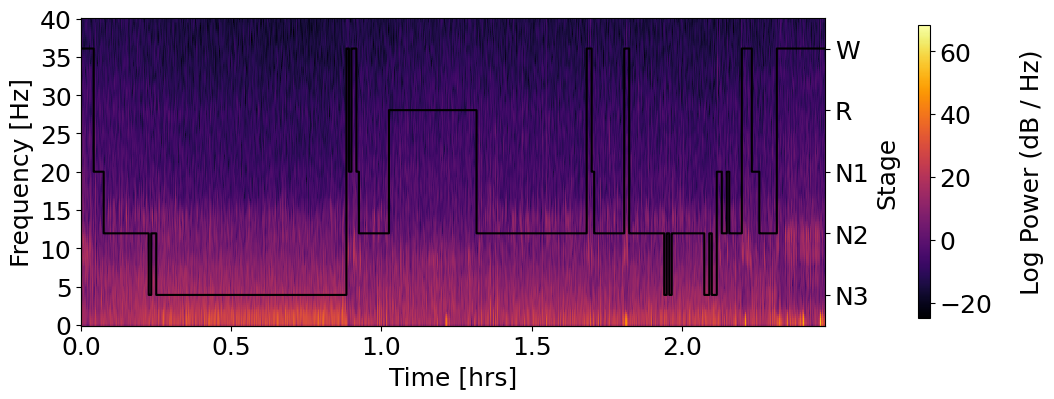

In [4]:
pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=4,
    freq_range=(0, 40),
    cmap='inferno',
    overlap=True,
    save=False)

### Power Spectral Density

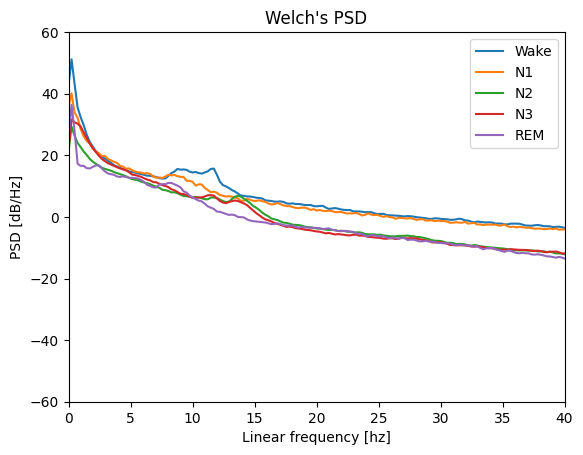

In [5]:
pipe.plot_psd_per_stage(
    picks=['E101'], 
    sec_per_seg=4.096,
    psd_range=(-60, 60),
    freq_range=(0, 40),
    xscale='linear',
    sleep_stages={'Wake' :0, 'N1' :1, 'N2': 2, 'N3': 3, 'REM': 4},
    save=False)

### Sleep Stats

In [6]:
pipe.sleep_stats(save_to_csv=False)

{'TIB': 148.66666666666666,
 'SPT': 136.5,
 'WASO': 5.5,
 'TST': 131.0,
 'N1': 6.5,
 'N2': 65.5,
 'N3': 41.5,
 'REM': 17.5,
 'NREM': 113.5,
 'SOL': 2.5,
 'Lat_N1': 2.5,
 'Lat_N2': 4.5,
 'Lat_N3': 13.5,
 'Lat_REM': 61.5,
 '%N1': 4.961832061068702,
 '%N2': 50.0,
 '%N3': 31.6793893129771,
 '%REM': 13.358778625954198,
 '%NREM': 86.6412213740458,
 'SE': 88.11659192825113,
 'SME': 95.97069597069597}